This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 2s 0us/step


In [2]:
train_images.shape

(60000, 784)

In [3]:
np.random.random((len(train_images), 784)).shape

(60000, 784)

In [5]:
train_images_with_noise_channels.shape

(60000, 1568)

In [ ]:
np.random.random((len(train_images), 784)) #noise channel

array([[0.58799466, 0.1936668 , 0.78988639, ..., 0.73957786, 0.12643084,
        0.22509171],
       [0.02456635, 0.54283514, 0.18450345, ..., 0.21653916, 0.97149645,
        0.38864858],
       [0.64530805, 0.68802568, 0.60871117, ..., 0.63511552, 0.88988547,
        0.95539981],
       ...,
       [0.28478317, 0.28958186, 0.25817821, ..., 0.4776133 , 0.1606999 ,
        0.10828651],
       [0.05660436, 0.13045927, 0.64764405, ..., 0.4653794 , 0.01513209,
        0.39736033],
       [0.4809617 , 0.54658069, 0.16591248, ..., 0.81887555, 0.43437508,
        0.53155058]])

In [ ]:
train_images_with_noise_channels.shape #784*2=1568

(60000, 1568)

In [ ]:
np.zeros((len(train_images), 784))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 6ms/step - loss: 0.6058 - accuracy: 0.8138 - val_loss: 0.2868 - val_accuracy: 0.9143
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2557 - accuracy: 0.9211 - val_loss: 0.2380 - val_accuracy: 0.9280
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1694 - accuracy: 0.9477 - val_loss: 0.1650 - val_accuracy: 0.9500
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1203 - accuracy: 0.9622 - val_loss: 0.1472 - val_accuracy: 0.9538
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0897 - accuracy: 0.9719 - val_loss: 0.1513 - val_accuracy: 0.9521
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0662 - accuracy: 0.9791 - val_loss: 0.1317 - val_accuracy: 0.9607
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0487 - accuracy: 0.9846 - val_loss: 0.1454 - val_accuracy: 0.9572
Epoch 

**Plotting a validation accuracy comparison**

validation accuracy

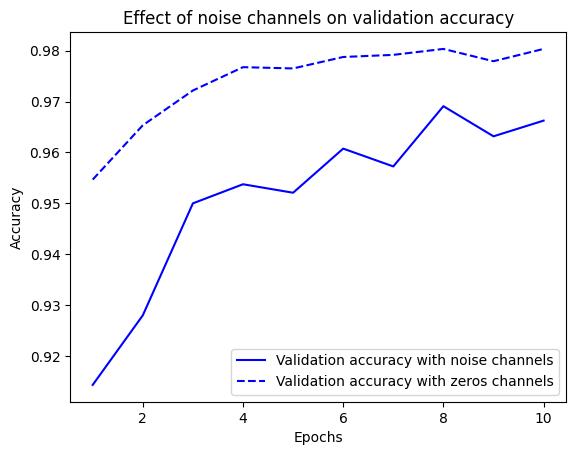

In [7]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Training accuracy

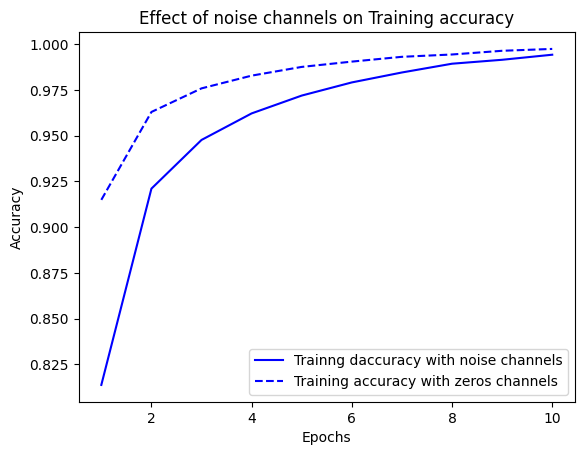

In [8]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["accuracy"]
val_acc_zeros = history_zeros.history["accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Trainng daccuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Training accuracy with zeros channels")
plt.title("Effect of noise channels on Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

모형 training 하기전에 라벨을 random하게 shuffle

In [9]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:].copy()#copy를 해야 원래 train_label이 안바뀜
np.random.shuffle(random_train_labels)

In [12]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [11]:
random_train_labels[:10]

array([6, 4, 6, 2, 7, 1, 4, 9, 3, 5], dtype=uint8)

In [13]:


model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 2.3161 - accuracy: 0.1033 - val_loss: 2.3042 - val_accuracy: 0.1023
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2998 - accuracy: 0.1164 - val_loss: 2.3103 - val_accuracy: 0.1013
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2926 - accuracy: 0.1248 - val_loss: 2.3175 - val_accuracy: 0.1015
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2806 - accuracy: 0.1396 - val_loss: 2.3242 - val_accuracy: 0.1002
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2650 - accuracy: 0.1516 - val_loss: 2.3307 - val_accuracy: 0.1013
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2467 - accuracy: 0.1645 - val_loss: 2.3446 - val_accuracy: 0.1019
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2240 - accuracy: 0.1781 - val_loss: 2.3618 - val_accuracy: 0.0993

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [14]:
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # accuracy 낮아짐 -> learning rate 조정정(learningrate 너무 크면 모형이 수렴하지 않음)
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 519.2129 - accuracy: 0.2517 - val_loss: 2.5471 - val_accuracy: 0.1197
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 3.0005 - accuracy: 0.1275 - val_loss: 2.2964 - val_accuracy: 0.1439
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 2.4470 - accuracy: 0.1358 - val_loss: 2.4518 - val_accuracy: 0.0963
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 2.4347 - accuracy: 0.1070 - val_loss: 2.4526 - val_accuracy: 0.1082
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 2.4663 - accuracy: 0.1096 - val_loss: 2.4382 - val_accuracy: 0.1062
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 2.4449 - accuracy: 0.1016 - val_loss: 2.3723 - val_accuracy: 0.0976
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4508 - accuracy: 0.0995 - val_loss: 2.4272 - val_accuracy: 0.1061
Epo

**The same model with a more appropriate learning rate**

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), #learning rate가 너무 작으면 수렴 속도가 느려지긴함. 그래도 작게 하는게 나음
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3450 - accuracy: 0.9120 - val_loss: 0.1297 - val_accuracy: 0.9621
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1284 - accuracy: 0.9654 - val_loss: 0.1412 - val_accuracy: 0.9635
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0983 - accuracy: 0.9740 - val_loss: 0.1431 - val_accuracy: 0.9696
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0808 - accuracy: 0.9790 - val_loss: 0.1535 - val_accuracy: 0.9692
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0643 - accuracy: 0.9840 - val_loss: 0.1733 - val_accuracy: 0.9697
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0619 - accuracy: 0.9849 - val_loss: 0.1786 - val_accuracy: 0.9692
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0572 - accuracy: 0.9863 - val_loss: 0.1659 - val_accuracy: 0.9747
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6706 - accuracy: 0.8322 - val_loss: 0.3611 - val_accuracy: 0.9042
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3537 - accuracy: 0.9037 - val_loss: 0.3129 - val_accuracy: 0.9115
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3182 - accuracy: 0.9114 - val_loss: 0.2920 - val_accuracy: 0.9180
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3017 - accuracy: 0.9166 - val_loss: 0.2830 - val_accuracy: 0.9205
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2919 - accuracy: 0.9190 - val_loss: 0.2779 - val_accuracy: 0.9233
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.9205 - val_loss: 0.2746 - val_accuracy: 0.9233
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2805 - accuracy: 0.9214 - val_loss: 0.2699 - val_accuracy: 0.9264
Epoch 

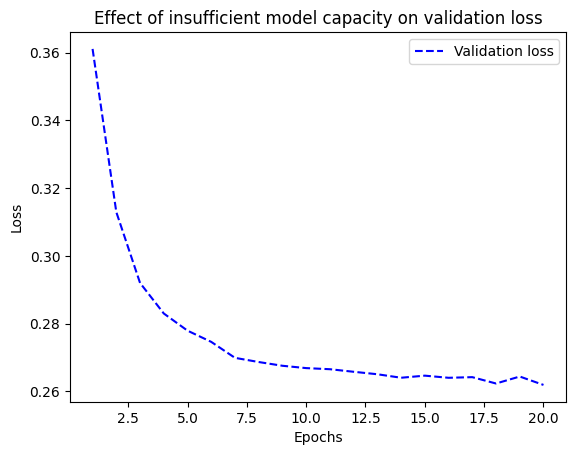

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3568 - accuracy: 0.8984 - val_loss: 0.1868 - val_accuracy: 0.9460
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1607 - accuracy: 0.9517 - val_loss: 0.1354 - val_accuracy: 0.9604
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1153 - accuracy: 0.9656 - val_loss: 0.1128 - val_accuracy: 0.9663
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0887 - accuracy: 0.9731 - val_loss: 0.1100 - val_accuracy: 0.9670
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9793 - val_loss: 0.1003 - val_accuracy: 0.9722
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0585 - accuracy: 0.9819 - val_loss: 0.0920 - val_accuracy: 0.9747
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0490 - accuracy: 0.9849 - val_loss: 0.0899 - val_accuracy: 0.9755
Epoch 

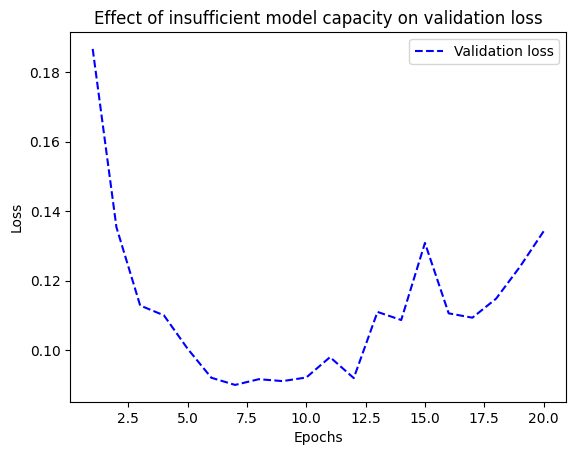

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
val_loss1 = history_small_model.history["val_loss"]
val_loss2 = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary